In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [49]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [50]:
df.shape

(5572, 5)

In [51]:
# Data Cleaning
# EDA
# Data preprocessing
# Model building 
# Evaluation
# Improvement
# Deploy

## Data Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
# Dropping last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [54]:
df.sample(5)

,v1,v2
4119,ham,Babe! How goes that day ? What are you up to ?...
1628,ham,Yes princess! I want to make you happy...
1784,ham,"Dont search love, let love find U. Thats why i..."
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...
3858,spam,Win the newest åÒHarry Potter and the Order of...


In [55]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

In [56]:
# Renaming the cols
df.rename(columns={"v1":"Target","v2":"text"},inplace=True)

In [57]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
df["Target"] = encoder.fit_transform(df["Target"])

In [60]:
df

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [61]:
# Missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [62]:
# Check for duplicate values
df.duplicated().sum()

403

In [63]:
df = df.drop_duplicates(keep="first")

In [64]:
df.shape

(5169, 2)

## EDA

In [65]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [66]:
# Hence our target column is imbalanced

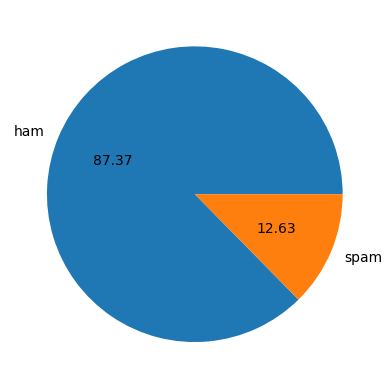

In [67]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [68]:
# Number of characters, number of words and number of sentences

In [69]:
import nltk 

In [70]:
a = df["text"].apply(len)

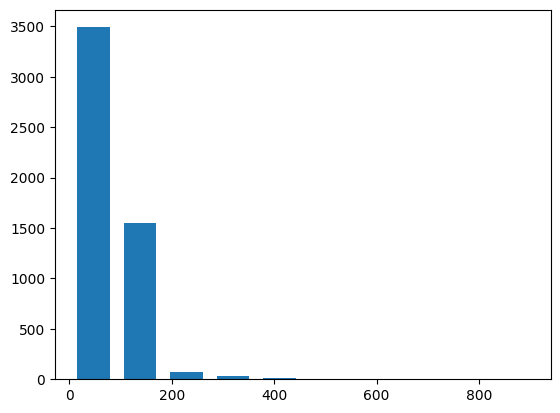

In [71]:
plt.hist(a,rwidth=0.7)
plt.show()

In [72]:
df["num_characters"] = df["text"].apply(len)

C:\Users\asus\AppData\Local\Temp\ipykernel_11776\2250809779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["text"].apply(len)


In [73]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [74]:
# num of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\asus\AppData\Local\Temp\ipykernel_11776\924332114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [75]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\asus\AppData\Local\Temp\ipykernel_11776\2681386824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [77]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [78]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
# ham
df[df["Target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
# spam
df[df["Target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


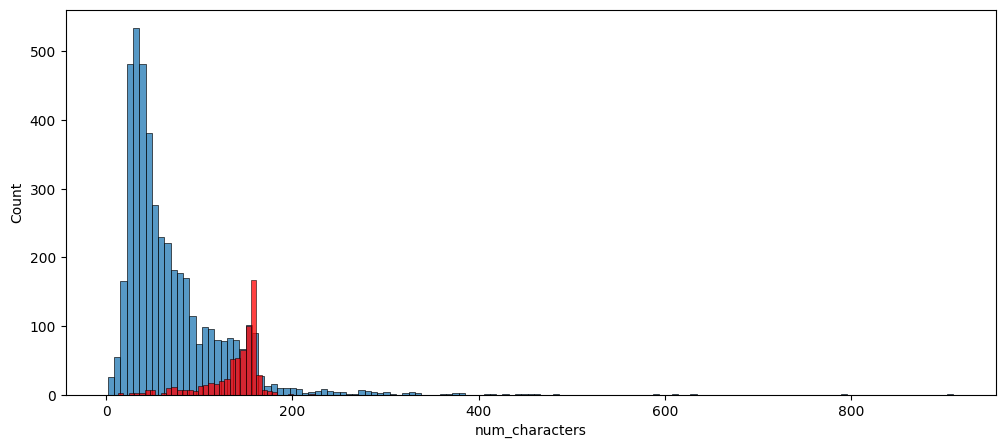

In [81]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df[df["Target"] == 0]["num_characters"])
sns.histplot(df[df["Target"] == 1]["num_characters"],color="red")
plt.show()

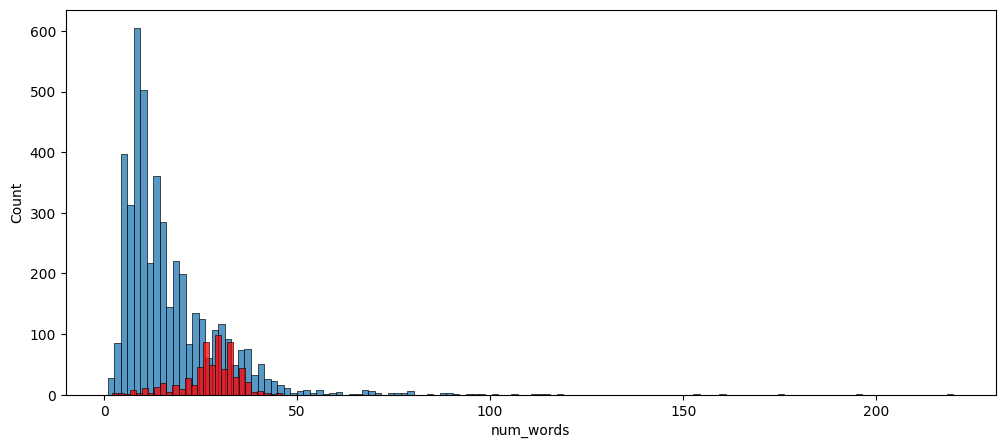

In [82]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["Target"] == 0]["num_words"])
sns.histplot(df[df["Target"] == 1]["num_words"],color="red")
plt.show()

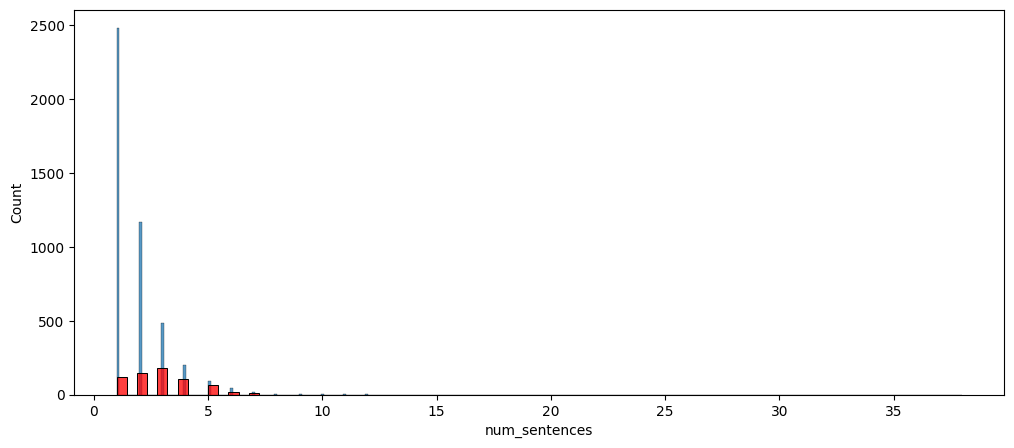

In [83]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["Target"] == 0]["num_sentences"])
sns.histplot(df[df["Target"] == 1]["num_sentences"],color="red")
plt.show()

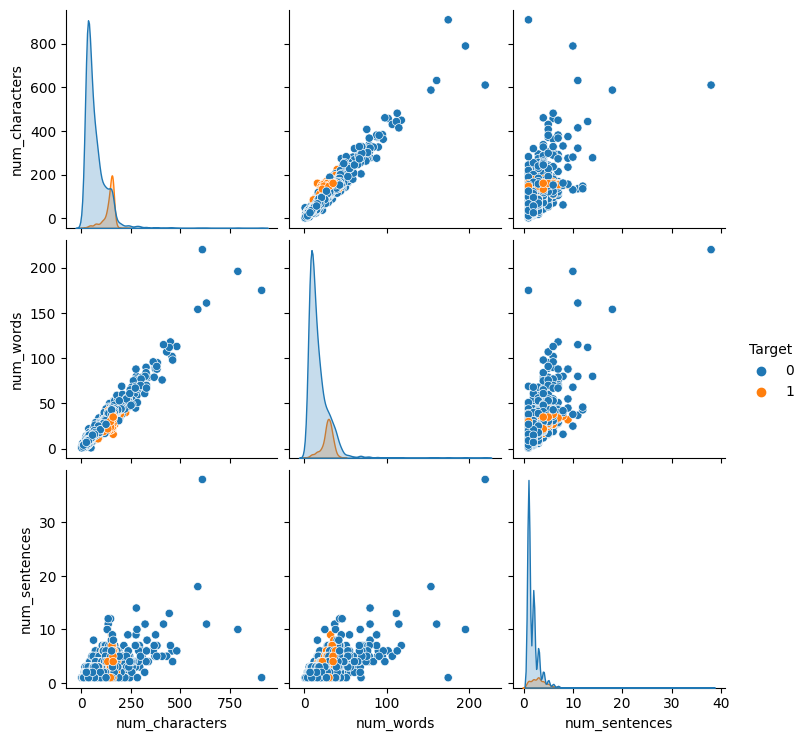

In [84]:
sns.pairplot(df,hue="Target")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_11776\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

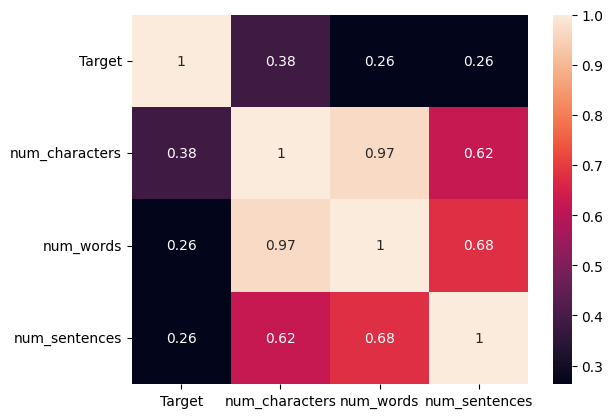

In [85]:
sns.heatmap(df.corr(),annot=True)

In [86]:
# Data Preprocessing

In [87]:
# nltk.download()

In [88]:
from nltk.corpus import stopwords

In [89]:
exclude = stopwords.words("english")

In [90]:
import string
punc = string.punctuation

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [92]:
def transorm_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalpha():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [93]:
transorm_text("Hello Nitish!!. Are you fine?")

'hello nitish fine'

In [94]:
transorm_text(df["text"][3])

'u dun say earli hor u c alreadi say'

In [95]:
# nltk.download("stopwords")

In [96]:
df["transformed_text"] = df["text"].apply(transorm_text)

C:\Users\asus\AppData\Local\Temp\ipykernel_11776\1248881218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["text"].apply(transorm_text)


In [97]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [98]:
from wordcloud import WordCloud

In [99]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [100]:
spam_wc = wc.generate(df[df["Target"] == 1]["transformed_text"].str.cat(sep=" "))

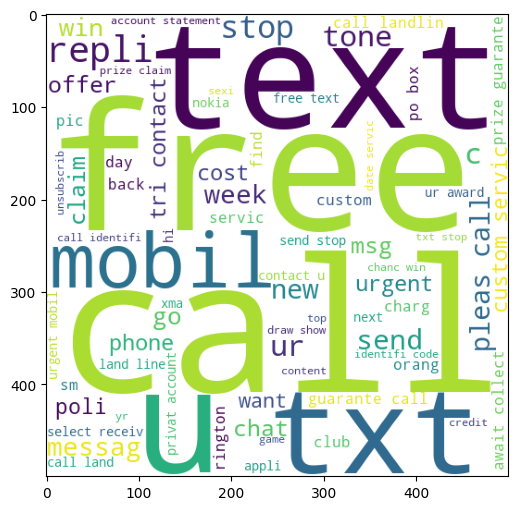

In [101]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [102]:
ham_wc = wc.generate(df[df["Target"] == 0]["transformed_text"].str.cat(sep=" "))

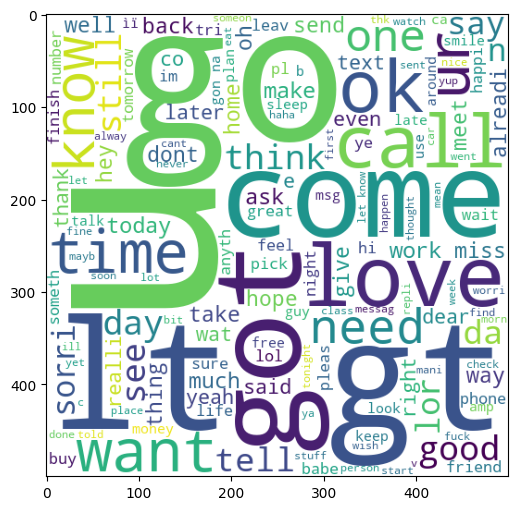

In [103]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [104]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
spam_corpus = []
for msg in df[df["Target"] == 1]["transformed_text"].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [106]:
len(spam_corpus)

8170

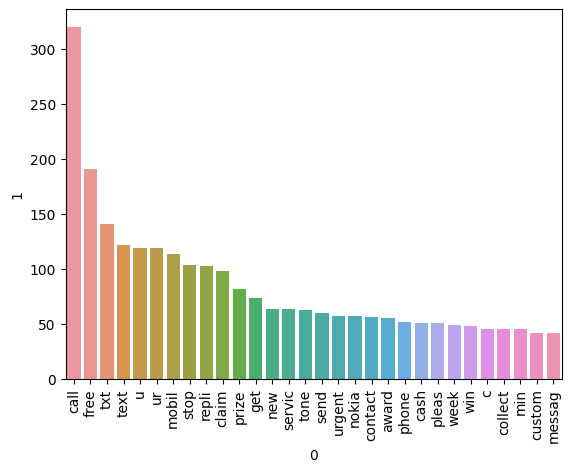

In [107]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [108]:
ham_corpus = []
for msg in df[df["Target"] == 0]["transformed_text"].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [109]:
len(ham_corpus)

34494

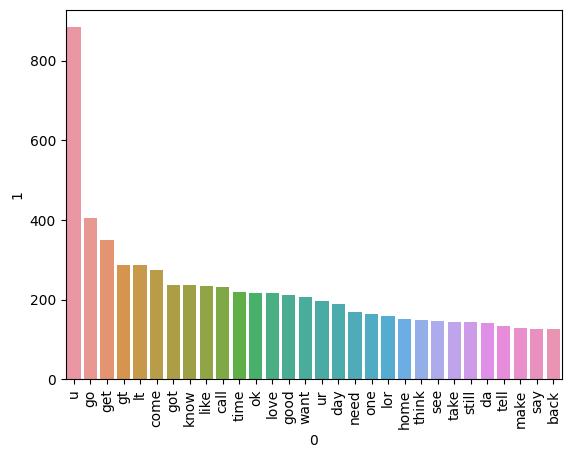

In [110]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [111]:
# Text Vectoriaztion
# Using bag of words

## Model Building

In [112]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [113]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [114]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
X.shape

(5169, 3000)

In [116]:
y = df["Target"].values

In [117]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [118]:
y.shape

(5169,)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [120]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [122]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.851063829787234
0.4577777777777778
[[777 122]
 [ 32 103]]


In [123]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9622823984526112
1.0
[[899   0]
 [ 39  96]]


In [124]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9690522243713733
0.963963963963964
[[895   4]
 [ 28 107]]


In [125]:
# So tfidf + Multinomial NB

In [126]:
# Checking all the algorithms 

In [127]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [128]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear",penalty="l1")
rfc = RandomForestClassifier(n_estimators=50,random_state=1)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [129]:
clfs = {
    "svc": svc,
    "KN": knc,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "ETC": etc,
    "GBDT": gdbt,
    "XGB": xgb
}

In [130]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [131]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.965183752417795, 0.9380530973451328)

In [132]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  svc
Accuracy -  0.965183752417795
precision -  0.9380530973451328
For  KN
Accuracy -  0.9206963249516441
precision -  0.9818181818181818
For  DT
Accuracy -  0.9119922630560928
precision -  0.7558139534883721
For  LR
Accuracy -  0.941972920696325
precision -  0.8865979381443299
For  RF
Accuracy -  0.9642166344294004
precision -  0.9375
For  AdaBoost
Accuracy -  0.9584139264990329
precision -  0.9181818181818182
For  ETC
Accuracy -  0.9700193423597679
precision -  0.9642857142857143
For  GBDT
Accuracy -  0.9400386847195358
precision -  0.9195402298850575
For  XGB
Accuracy -  0.9574468085106383
precision -  0.9099099099099099


In [133]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores})

In [134]:
performance_df

,Algorithm,Accuracy,Precision
0,svc,0.965184,0.938053
1,KN,0.920696,0.981818
2,DT,0.911992,0.755814
3,LR,0.941973,0.886598
4,RF,0.964217,0.937500
5,AdaBoost,0.958414,0.918182
6,ETC,0.970019,0.964286
7,GBDT,0.940039,0.919540
8,XGB,0.957447,0.909910


In [135]:
# So our model also got improved when we capped our max_features upto 3000 limit
# And Hence it will be our final model

In [136]:
import pickle
pickle.dump(tfidf,open("vectorizer.plk","wb"))
pickle.dump(mnb,open("model.pkl","wb"))